- Utilisation de bigml pour créer des modèles d'apprentissage

In [34]:
from pandas import DataFrame, read_csv, Series
import matplotlib.pyplot as plt
%matplotlib notebook

from numpy import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

- Importation des dataframe depuis les fichiers générés précédemment

In [35]:
train_full = read_csv('fulltrain_mod.csv', index_col=0)

- Création du split trainfull en 80/20 pour train/test

In [36]:
train_dataset, val_dataset = train_test_split(train_full, test_size=0.2, random_state=17)
print("Train full shape: " + str(train_full.shape))
print("Train shape: " + str(train_dataset.shape))
print("Val shape: " + str(val_dataset.shape))

Train full shape: (150000, 14)
Train shape: (120000, 14)
Val shape: (30000, 14)


In [37]:
train_dataset.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_sansna,Sum,IncomePerPerson
147628,0,0.082562,63,0,126.000000,NaN,7,0,0,0,0.0,0.0,0,NaN
66735,0,0.000000,43,0,0.208955,13600.0,6,0,1,0,1.0,13600.0,0,6800.0
49613,0,0.098980,58,1,0.334405,5600.0,5,0,2,0,0.0,5600.0,1,5600.0
98133,0,0.504162,51,0,4725.000000,NaN,9,0,2,0,5.0,0.0,0,NaN
1889,0,1.000000,62,0,0.032639,1776.0,1,1,0,0,0.0,1776.0,1,1776.0


- Nettoyage des donneés pour pouvoir les soumettre à la génération de modèle

In [38]:
train_dataset.fillna(0, inplace=True)
val_dataset.fillna(0, inplace=True)
train_dataset.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_sansna,Sum,IncomePerPerson
147628,0,0.082562,63,0,126.000000,0.0,7,0,0,0,0.0,0.0,0,0.0
66735,0,0.000000,43,0,0.208955,13600.0,6,0,1,0,1.0,13600.0,0,6800.0
49613,0,0.098980,58,1,0.334405,5600.0,5,0,2,0,0.0,5600.0,1,5600.0
98133,0,0.504162,51,0,4725.000000,0.0,9,0,2,0,5.0,0.0,0,0.0
1889,0,1.000000,62,0,0.032639,1776.0,1,1,0,0,0.0,1776.0,1,1776.0


- découpage des données en X (inputs) et Y (outputs)

In [39]:
Y_train = train_dataset['SeriousDlqin2yrs']
X_train = train_dataset.drop('SeriousDlqin2yrs', axis=1)

Y_val = val_dataset['SeriousDlqin2yrs']
X_val = val_dataset.drop('SeriousDlqin2yrs', axis=1)

In [40]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_sansna,Sum,IncomePerPerson
147628,0.082562,63,0,126.000000,0.0,7,0,0,0,0.0,0.0,0,0.0
66735,0.000000,43,0,0.208955,13600.0,6,0,1,0,1.0,13600.0,0,6800.0
49613,0.098980,58,1,0.334405,5600.0,5,0,2,0,0.0,5600.0,1,5600.0
98133,0.504162,51,0,4725.000000,0.0,9,0,2,0,5.0,0.0,0,0.0
1889,1.000000,62,0,0.032639,1776.0,1,1,0,0,0.0,1776.0,1,1776.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25632,0.692263,58,0,530.000000,0.0,3,0,0,0,2.0,0.0,0,0.0
125681,0.047413,75,0,744.000000,0.0,11,0,0,0,0.0,0.0,0,0.0
42298,0.244320,65,0,0.358423,10933.0,9,0,1,0,0.0,10933.0,0,10933.0
34960,0.645418,32,0,0.149402,2422.0,3,0,0,0,1.0,2422.0,0,1211.0


In [41]:
Y_train.head()

147628    0
66735     0
49613     0
98133     0
1889      0
Name: SeriousDlqin2yrs, dtype: int64

- Génération du modèle d'apprentissage

In [10]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

- Application du modèle sur le set de validation

In [11]:
y_val_proba = model.predict_proba(X_val)
print(y_val_proba)

[[1.  0. ]
 [0.6 0.4]
 [1.  0. ]
 ...
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]]


- L'on récupère la colonne des 1 Proba

In [12]:
y_val_proba = y_val_proba[:,1]
print(y_val_proba)

[0.  0.4 0.  ... 0.  0.  0.1]


- Critère de performance ROC AUC

In [13]:
from sklearn import metrics
metrics.roc_auc_score(Y_val, y_val_proba)

0.7869373683081335

- Génération de la prédiction sur le 20% validation

In [14]:
threshold = 0.5
y_val_pred = [1 if p >= threshold else 0 for p in y_val_proba]

- Matrice de confusion

In [15]:
metrics.confusion_matrix(Y_val, y_val_pred)

array([[27378,   647],
       [ 1468,   507]])

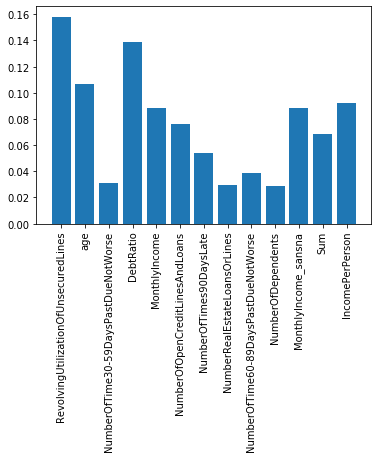

In [33]:
names = X_train.columns

plt.bar(names, model.feature_importances_)
plt.xticks(names, rotation=90);